# Transitions of Weighted Directed Graphs
## Author: Snigdhayan Mahanta

Consider two weighted directed graphs. The minimum-cost edit paths between them are the transitions needed to transform the first graph into the second one up to an isomorphism. I computed the minimum-cost edit paths ignoring the weights and then computed the transition cost for each edit path based on the weights.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Utility function to create a weighted directed graph

# Create a random weighted directed graph by number of vertices and edges
def create_graph(n_vertices, n_edges):
    edges = []
    for _ in range(1, n_edges+1):
        vertices = range(1, n_vertices+1)
        x = list(np.random.choice(vertices, size = 2, replace = False))
        x.append({"weight": np.random.randint(low = 1, high = 10, size = 1)[0]})
        x = tuple(x)
        edges.append(x)
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    return graph

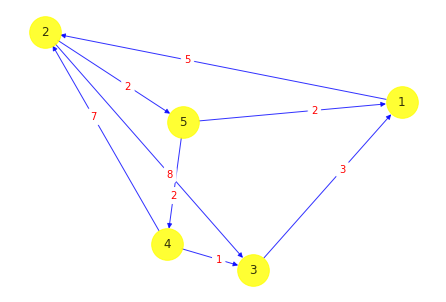

{(5, 1): 2,
 (5, 4): 2,
 (1, 2): 5,
 (2, 5): 2,
 (2, 3): 8,
 (3, 1): 3,
 (4, 2): 7,
 (4, 3): 1}

In [3]:
# Create a random weighted directed graph and visualize it
Graph1 = create_graph(5, 10)
pos = nx.kamada_kawai_layout(Graph1)
plt.figure()    
nx.draw(Graph1, 
        pos, 
        edge_color='blue', 
        width=1,
        linewidths=1,
        node_size=1000,
        node_color='yellow',
        alpha=0.8, 
        labels={node:node for node in Graph1.nodes()})

edgeLabels = nx.get_edge_attributes(Graph1,'weight')
nx.draw_networkx_edge_labels(Graph1, 
                             pos,
                             edge_labels=edgeLabels,
                             label_pos=0.4,
                             rotate=False,
                             font_color='red')
plt.axis('off')
plt.show()
edgeLabels

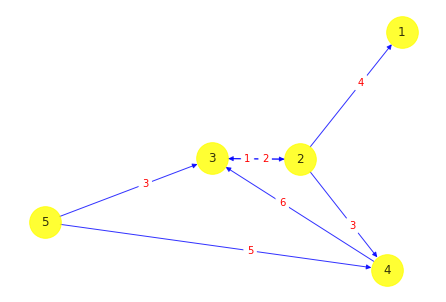

{(2, 1): 4, (2, 4): 3, (2, 3): 1, (3, 2): 2, (5, 3): 3, (5, 4): 5, (4, 3): 6}

In [4]:
# Create another random weighted directed graph and visualize it
Graph2 = create_graph(5, 10)
pos = nx.kamada_kawai_layout(Graph2)
plt.figure()    
nx.draw(Graph2, 
        pos, 
        edge_color='blue', 
        width=1,
        linewidths=1,
        node_size=1000,
        node_color='yellow',
        alpha=0.8, 
        labels={node:node for node in Graph2.nodes()})

edgeLabels = nx.get_edge_attributes(Graph2,'weight')
nx.draw_networkx_edge_labels(Graph2, 
                             pos,
                             edge_labels=edgeLabels,
                             label_pos=0.4,
                             rotate=False,
                             font_color='red')
plt.axis('off')
plt.show()
edgeLabels

In [5]:
# Define the function to compute the edit paths and the transition costs
def graph_transition_costs(graph1, graph2):
    # Weight_list1 = nx.get_edge_attributes(graph1, 'weight')
    # Weight_list2 = nx.get_edge_attributes(graph2, 'weight')
    OEPs = nx.optimal_edit_paths(graph1, graph2)
    transitions = [element[1] for element in OEPs[0]]
    transition_costs = []
    for i in range(len(transitions)):
        cost1 = [graph1.edges[item[0]]['weight'] if item[0] != None else 0 for item in transitions[i]]
        cost2 = [graph2.edges[item[1]]['weight'] if item[1] != None else 0 for item in transitions[i]]
        cost = sum([pair[1] - pair[0] for pair in zip(cost1, cost2)])
        transition_costs.append(cost)
    return OEPs, transition_costs

In [6]:
# Compute the edit paths and transition costs
EditPaths, TransitionCosts = graph_transition_costs(Graph2, Graph1)

In [7]:
EditPaths

([([(2, 5), (4, 1), (3, 2), (5, 3), (1, 4)],
   [((2, 4), (5, 1)),
    ((2, 3), None),
    ((3, 2), (2, 5)),
    ((4, 3), (1, 2)),
    ((5, 3), None),
    ((5, 4), (3, 1)),
    (None, (2, 3)),
    ((2, 1), (5, 4)),
    (None, (4, 2)),
    (None, (4, 3))]),
  ([(1, 5), (2, 1), (4, 2), (3, 3), (5, 4)],
   [((2, 1), None),
    (None, (5, 1)),
    ((2, 4), (1, 2)),
    (None, (2, 5)),
    ((2, 3), None),
    ((3, 2), (3, 1)),
    ((4, 3), (2, 3)),
    ((5, 3), (4, 3)),
    ((5, 4), (4, 2)),
    (None, (5, 4))]),
  ([(1, 5), (3, 1), (2, 2), (4, 3), (5, 4)],
   [(None, (5, 1)),
    ((2, 1), (2, 5)),
    ((2, 3), None),
    ((3, 2), (1, 2)),
    ((2, 4), (2, 3)),
    ((4, 3), (3, 1)),
    ((5, 3), None),
    ((5, 4), (4, 3)),
    (None, (5, 4)),
    (None, (4, 2))]),
  ([(3, 5), (5, 1), (4, 2), (1, 3), (2, 4)],
   [((5, 3), None),
    (None, (5, 1)),
    ((5, 4), (1, 2)),
    ((4, 3), (2, 5)),
    (None, (2, 3)),
    (None, (3, 1)),
    ((2, 1), (4, 3)),
    ((2, 4), (4, 2)),
    ((2, 3), Non

In [8]:
TransitionCosts

[6, 6, 6, 6]